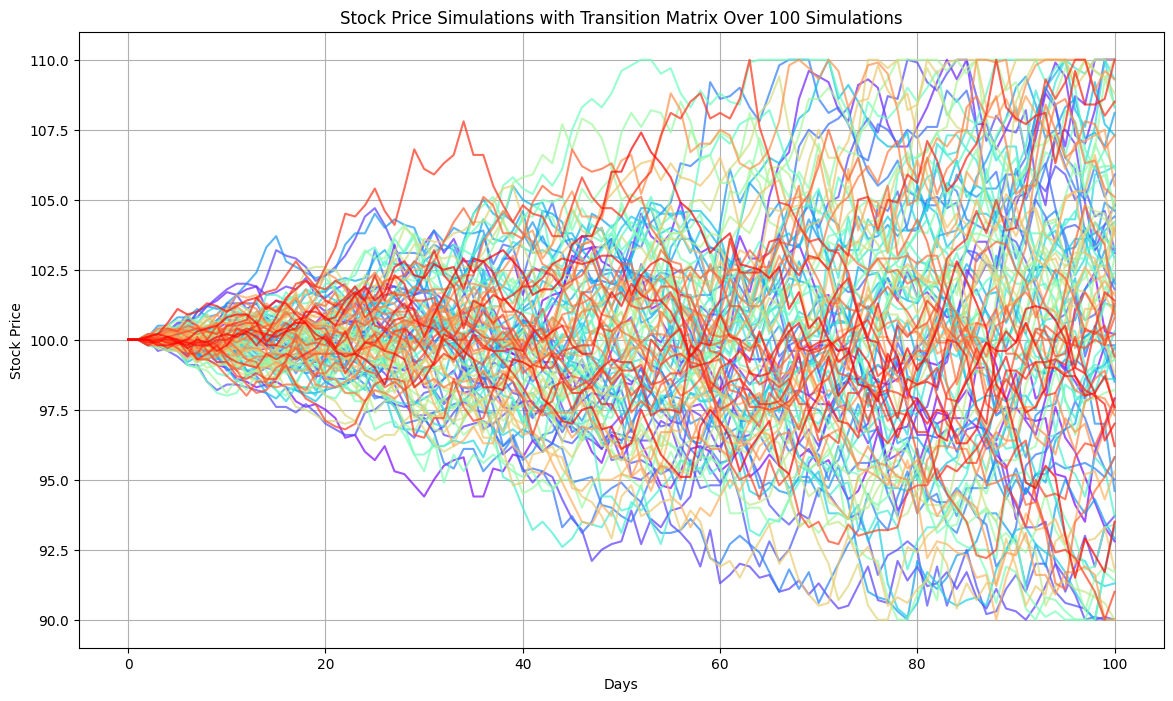

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Parameters for the stock price simulation
initial_price = 100  # Starting stock price
n_simulations = 100  # Number of simulations
n_days = 100  # Number of days to simulate

# Define price levels from 90 to 110 with increments of 0.1
price_levels = np.arange(90, 110.1, 0.1)
n_levels = len(price_levels)

# Define a transition matrix
# Initialize with uniform probabilities for simplicity
transition_matrix = np.ones((n_levels, n_levels)) / n_levels

# Example: Modifying transition probabilities for demonstration
for i in range(n_levels):
    transition_matrix[i] = np.random.dirichlet(np.ones(n_levels))  # Random probabilities

# Create a colormap with different colors
colors = cm.rainbow(np.linspace(0, 1, n_simulations))

# Simulate stock prices
all_simulations = []

for _ in range(n_simulations):
    prices = [initial_price]
    current_price = initial_price
    
    for day in range(n_days):
        # Dynamic volatility: Start small and increase over time
        volatility = 0.01 * np.sqrt(day / n_days)  # Gradual increase in volatility
        
        # Simulate price change with small increments
        daily_return = np.random.normal(0, volatility)
        next_price = current_price * (1 + daily_return)
        
        # Ensure the next price stays within the defined price levels
        next_price = np.clip(next_price, price_levels[0], price_levels[-1])
        
        # Determine the index of the next price level
        next_level_index = np.abs(price_levels - next_price).argmin()
        next_price = price_levels[next_level_index]
        
        # Update the price and store it
        prices.append(next_price)
        current_price = next_price
    
    all_simulations.append(prices)

# Plot all simulations with different colors
plt.figure(figsize=(14, 8))  # Increased figure size

for i, simulation in enumerate(all_simulations):
    plt.plot(simulation, color=colors[i], alpha=0.7)

plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Simulations with Transition Matrix Over {n_simulations} Simulations')
plt.grid(True)
plt.show()